In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
np.random.seed(42)
path = Path('../data/imgs')

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.densenet201, metrics=[accuracy, FBeta(average='macro')])

In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.360910,0.103648,0.969001,0.966900,04:47
1,0.130690,0.030114,0.990187,0.989772,02:59
2,0.055162,0.022285,0.993756,0.993374,02:59


In [7]:
learn.save('densenet201-stage-1')

In [8]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


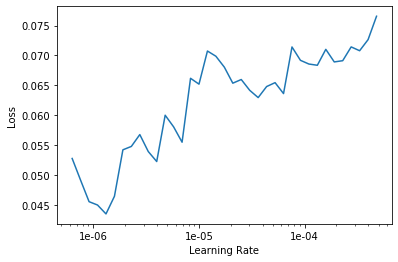

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(3, max_lr=slice(4e-7, 1e-5))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.056879,0.020299,0.994202,0.993827,03:32
1,0.055027,0.019201,0.994871,0.994531,03:32
2,0.046196,0.019372,0.994202,0.993796,03:32


In [11]:
learn.save('densenet201-stage-2')

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


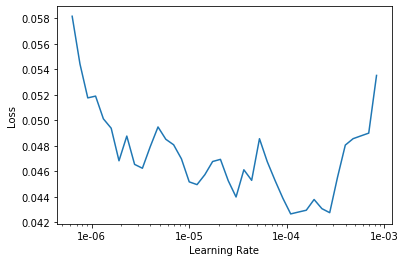

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(3, max_lr=slice(2e-5, 6e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.096756,0.043251,0.987288,0.986889,03:32
1,0.030278,0.014459,0.995540,0.995357,03:32
2,0.008310,0.006505,0.997993,0.998000,03:32


In [16]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 5e-5))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.006952,0.005917,0.998662,0.998629,03:32
1,0.006252,0.006179,0.998439,0.998372,03:32
2,0.005830,0.005601,0.998439,0.998371,03:31
3,0.006743,0.005371,0.998662,0.998582,03:31
4,0.005023,0.005144,0.998662,0.998582,03:31


In [18]:
learn.fit_one_cycle(3, max_lr=slice(2e-7, 3e-5))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.005877,0.005536,0.998662,0.998586,03:33
1,0.004826,0.005051,0.998885,0.998854,03:32
2,0.003272,0.004979,0.998885,0.998854,03:32


In [19]:
learn.save('densenet201-stage-3')

In [20]:
learn.fit_one_cycle(3, max_lr=slice(4e-8, 5e-6))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.003688,0.004944,0.998885,0.998854,03:31
1,0.002498,0.004831,0.998885,0.998854,03:32
2,0.004508,0.004901,0.998885,0.998812,03:31


In [21]:
learn.export()

# Submission

In [22]:
import pandas as pd

In [26]:
preds = learn.get_preds(ds_type=DatasetType.Test)
pred_weights = preds[0]
pred_weights[:5]

In [51]:
names = [item.name for item in data.test_ds.items]
df = pd.DataFrame(pred_weights, columns=data.classes)
df = df.applymap(lambda v: v.item())
df.insert(0, 'img', names)
df.set_index('img', inplace=True)
df.sort_index(axis='index', inplace=True)

In [52]:
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
img,,,,,,,,,,
img_1.jpg,2.165916e-06,1.416850e-05,2.552860e-06,6.726242e-06,3.325582e-07,9.990786e-01,7.063240e-08,2.552735e-04,1.961951e-05,6.204648e-04
img_10.jpg,4.190487e-04,2.153001e-07,7.194344e-07,1.732400e-07,2.633013e-07,9.995553e-01,6.075246e-06,1.702427e-07,1.762268e-05,4.494122e-07
img_100.jpg,9.624180e-01,1.158012e-03,1.836877e-05,2.130487e-05,2.040911e-05,3.298998e-07,3.700594e-04,3.850441e-03,1.411264e-02,1.803039e-02
img_1000.jpg,4.040092e-10,9.400646e-10,2.432717e-05,1.108774e-10,1.281465e-09,1.850751e-10,8.780874e-09,7.935866e-10,9.999731e-01,2.647279e-06
img_100000.jpg,8.572250e-06,1.297692e-05,2.211867e-06,9.992274e-01,4.303667e-04,4.788334e-06,1.827861e-05,1.368528e-07,2.780376e-04,1.732141e-05
...,...,...,...,...,...,...,...,...,...,...
img_99994.jpg,4.701024e-09,1.000000e+00,2.232980e-08,3.737610e-09,1.843610e-13,2.376544e-09,5.839214e-09,5.993430e-09,4.386623e-11,1.667982e-10
img_99995.jpg,1.316978e-07,3.682614e-07,7.097483e-11,9.999965e-01,3.449809e-07,3.482129e-09,6.366061e-08,2.363489e-06,3.275299e-08,6.564221e-08
img_99996.jpg,6.973191e-07,9.086850e-07,2.080224e-07,1.089352e-03,9.988762e-01,2.256886e-09,3.434124e-07,2.364470e-05,8.337755e-06,3.112902e-07


In [53]:
df.to_csv('submission.csv')